In [1]:
import pandas as pd
import numpy as np

### **Conhecendo a Variável de Interesse**

In [2]:
df = pd.read_csv("desafio1.csv")

In [3]:
df.head()

,RowNumber,id,sobrenome,pontuacao_credito,estado_residencia,genero,idade,nivel_estabilidade,saldo_conta,numero_produtos,possui_cartao_de_credito,membro_ativo
0,1,e7f44fcbd380d4cef7e6c232cc7e37895c3fd197,6d6e0aa1b9b413e442e2fb68df14b4fc3f91de50,619,SC,F,42,2,0.00,1,1,1
1,2,28dcb083ad90512da16b9430085c2cddb8ca5e12,48e1ad846796fa314f1b4a6702b83343eb5482c5,608,RS,F,41,1,83807.86,1,0,1
2,3,774bc378f787438c9c7594e536787d07a097a54b,f2b29d5d934de615812b697132e767dea0f1e9e2,502,SC,F,42,8,159660.80,3,1,0
3,4,043a71326f7096de155e7f0c559dc62b5e4b7239,85d5c9da7cddd8109ad32a6c348fe2bb10bf99f2,699,SC,F,39,1,0.00,2,0,0
4,5,37b3bb8ca243955fb3605ec7e1c2a4607cdb3b22,ddc89c837a6933639de75f28171057060bd322df,850,RS,F,43,2,125510.82,1,1,1


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7000 entries, 0 to 6999
Data columns (total 12 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   RowNumber                 7000 non-null   int64  
 1   id                        7000 non-null   object 
 2   sobrenome                 7000 non-null   object 
 3   pontuacao_credito         7000 non-null   int64  
 4   estado_residencia         7000 non-null   object 
 5   genero                    7000 non-null   object 
 6   idade                     7000 non-null   int64  
 7   nivel_estabilidade        7000 non-null   int64  
 8   saldo_conta               7000 non-null   float64
 9   numero_produtos           7000 non-null   int64  
 10  possui_cartao_de_credito  7000 non-null   int64  
 11  membro_ativo              7000 non-null   int64  
dtypes: float64(1), int64(7), object(4)
memory usage: 656.4+ KB


In [5]:
df.isna().sum()

RowNumber                   0
id                          0
sobrenome                   0
pontuacao_credito           0
estado_residencia           0
genero                      0
idade                       0
nivel_estabilidade          0
saldo_conta                 0
numero_produtos             0
possui_cartao_de_credito    0
membro_ativo                0
dtype: int64

In [6]:
df.pontuacao_credito.describe()

count    7000.000000
mean      649.787000
std        97.046279
min       350.000000
25%       582.000000
50%       651.000000
75%       717.000000
max       850.000000
Name: pontuacao_credito, dtype: float64

In [9]:
import seaborn as sns
import matplotlib.pyplot as plt

Text(0.5, 1.0, 'Estado de Residência por Pontuação de Crédito')

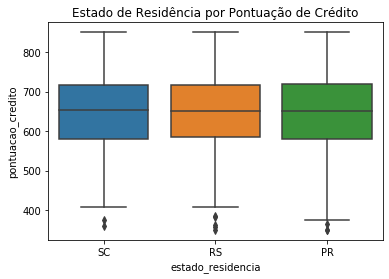

In [12]:
sns.boxplot(x='estado_residencia',y='pontuacao_credito',data=df)
plt.title('Estado de Residência por Pontuação de Crédito')

##### É possível observar que parece não haver diferença entre as pontuações de crédito e o estado de residência, de qualquer forma irei separar por gênero... 

Text(0.5, 1.0, 'Estado de Residência por Pontuação de Crédito')

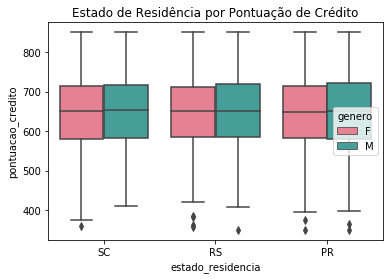

In [13]:
sns.boxplot(x='estado_residencia',y='pontuacao_credito',hue='genero',data=df,palette='husl')
plt.title('Estado de Residência por Pontuação de Crédito')

##### Parece haver evidência que também não existe diferença de pontuação por gênero. O ideal seria fazer um teste de hipótese com comparação de médias.

## **Resposta do Desafio**

In [14]:
sub=df.groupby('estado_residencia').pontuacao_credito.agg(['mean','median',pd.Series.mode, 'std'])
sub

,mean,median,mode,std
estado_residencia,,,,
PR,648.961294,650,850,98.607186
RS,651.105143,650,850,95.136598
SC,649.537653,653,850,97.233493


In [16]:
sub.columns=['Média','Mediana','Moda','Desvio_Padrão']
sub

,Média,Mediana,Moda,Desvio_Padrão
estado_residencia,,,,
PR,648.961294,650,850,98.607186
RS,651.105143,650,850,95.136598
SC,649.537653,653,850,97.233493


In [24]:
sub=sub.transpose()
sub

estado_residencia,PR,RS,SC
Media,648.961294,651.105143,649.537653
Mediana,650.000000,650.000000,653.000000
Moda,850.000000,850.000000,850.000000
Desvio_Padrao,98.607186,95.136598,97.233493


In [25]:
sub.columns=['PR','RS','SC']

In [30]:
sub1=sub.reindex((sub.columns.sort_values(ascending=False)),axis=1)
sub1

,SC,RS,PR
Media,649.537653,651.105143,648.961294
Mediana,653.000000,650.000000,650.000000
Moda,850.000000,850.000000,850.000000
Desvio_Padrao,97.233493,95.136598,98.607186


In [33]:
sub.to_json('submission.json',orient='columns')

In [34]:
pd.read_json('submission.json')

,PR,RS,SC
Media,648.961294,651.105143,649.537653
Mediana,650.000000,650.000000,653.000000
Moda,850.000000,850.000000,850.000000
Desvio_Padrao,98.607186,95.136598,97.233493
